In [1]:
# Import the libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [25]:
# Training Parameters
learning_rate = 0.001
num_steps = 500
batch_size = 128
display_step = 10

In [26]:
# Network Parameters
num_input = 784 # MNIST data input (Image shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout probability

In [27]:
# Create placeholder variables
def create_placeholders():
    
    X = tf.placeholder(tf.float32, [None, num_input])
    Y = tf.placeholder(tf.float32, [None, num_classes])
    keep_prob = tf.placeholder(tf.float32)
    return X, Y, keep_prob

In [28]:
#Defines a conv layer with bias and activation
def conv2d(x, W, b, strides = 1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [29]:
#Defines a pooling layer
def maxpool2d(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [30]:
def conv_net(x, weights, biases, dropout):
    
    # MNIST data is 1D input vector with 784 features(28*28).
    #Reshape it to a 4D tensor  with the second and third dimensions corresponding to image width and height,
    #and the final dimension corresponding to the number of color channels.
    x = tf.reshape(x, [-1, 28, 28, 1])
    
    # Convolution layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    #Max pooling
    conv1 = maxpool2d(conv1)
    
    #Convolution layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    #Max pooling
    conv2 = maxpool2d(conv2)
    
    #Fully connected layer
    fc1 = tf.reshape(conv2, [-1, 7*7*64])
    fc1 = tf.add(tf.matmul(fc1, weights['wf1']), biases['bf1'])
    fc1 = tf.nn.relu(fc1)
    
    #Apply dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    
    #Output
    output = tf.matmul(fc1, weights['out']) + biases['out']
    return output

In [31]:
# Weights and Biases
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wf1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bf1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [32]:
X, Y, keep_prob = create_placeholders()

#Forward Propagation
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

#Define the cost function and back propagate using Adam Optimizer which minimizes the loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [34]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
costs = []
with tf.Session() as sess:
    
    sess.run(init)
    for step in range(num_steps):
        minibatch_cost = 0
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        #Run the session
        _, temp_cost = sess.run([train, loss], feed_dict = {X:batch_x, Y:batch_y, keep_prob:dropout})
        minibatch_cost += temp_cost / mnist.train.num_examples
        
        if step % 10 == 0:
            print ("Cost after epoch %i: %f" % (step, minibatch_cost))
        if step % 1 == 0:
            costs.append(minibatch_cost)
        
    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    #Calculate accuracy of 256 MNIST Test images
    print('Testing Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                      Y: mnist.test.labels[:256],
                                      keep_prob: 1.0}))
        


Cost after epoch 0: 1.060101
Cost after epoch 10: 0.653583
Cost after epoch 20: 0.364022
Cost after epoch 30: 0.309482
Cost after epoch 40: 0.237165
Cost after epoch 50: 0.112175
Cost after epoch 60: 0.150957
Cost after epoch 70: 0.106927
Cost after epoch 80: 0.088294
Cost after epoch 90: 0.058641
Cost after epoch 100: 0.087036
Cost after epoch 110: 0.057842
Cost after epoch 120: 0.070339
Cost after epoch 130: 0.066359
Cost after epoch 140: 0.075017
Cost after epoch 150: 0.043486
Cost after epoch 160: 0.061409
Cost after epoch 170: 0.051636
Cost after epoch 180: 0.034988
Cost after epoch 190: 0.025474
Cost after epoch 200: 0.052736
Cost after epoch 210: 0.037166
Cost after epoch 220: 0.041765
Cost after epoch 230: 0.046420
Cost after epoch 240: 0.037013
Cost after epoch 250: 0.040434
Cost after epoch 260: 0.033264
Cost after epoch 270: 0.048802
Cost after epoch 280: 0.046686
Cost after epoch 290: 0.041020
Cost after epoch 300: 0.027336
Cost after epoch 310: 0.052837
Cost after epoch 32

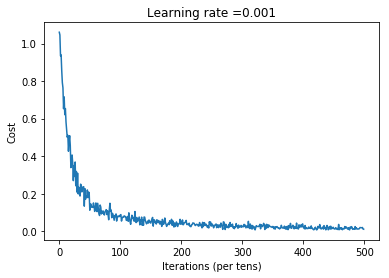

In [35]:
#Plot the cost function
import numpy as np
plt.plot(np.squeeze(costs))
plt.ylabel('Cost')
plt.xlabel('Iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()